






# SPAM SMS DETECTION

We get lots and lots of SMS, Some are useful and some are SPAM. So using a machine learning algorithm we will classify the message as SPAM or useful.

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing the SMS dataset

In [2]:
SMS_DATA= pd.read_csv('SMSSpamCollection', sep='\t',names=["Category", "Message"])

### EXPLORING THE DATASET

In [3]:
SMS_DATA.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
SMS_DATA.shape

(5572, 2)

In [5]:
SMS_DATA.drop_duplicates(inplace=True)

In [6]:
SMS_DATA.reset_index(drop=True,inplace=True)

In [7]:
SMS_DATA.shape

(5169, 2)

In [8]:
SMS_DATA['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

### BASIC VISUALIZATION

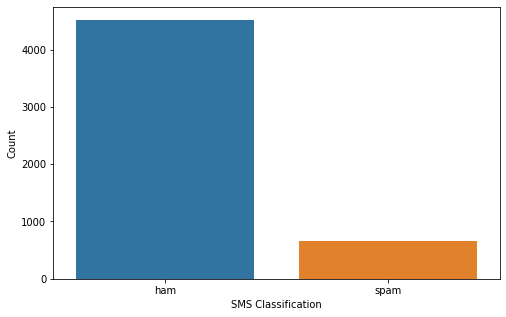

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=SMS_DATA)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

### Cleaning The Data And Preprocessing

In cleaning we generally perform these steps-:
 1. Removing The Punctuation
 2. Tokenization
 3. Removing Stopwords
 4. Lemmitization
    

In [10]:
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
import string
import re

In [11]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

SMS_DATA['Cleaned_Message'] = SMS_DATA['Message'].apply(lambda x: clean_text(x.lower()))


In [12]:
SMS_DATA.head()

,Category,Message,Cleaned_Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [13]:
from nltk.corpus import wordnet as wn

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

SMS_DATA['Lematized_Message'] = SMS_DATA['Cleaned_Message'].apply(lambda x: lemmatizing(x))

SMS_DATA.head(10)

,Category,Message,Cleaned_Message,Lematized_Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[freemsg, hey, darling, 3, weeks, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send...","[freemsg, hey, darling, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send,..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."


## APPLYING COUNT VECTORIZER

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=lemmatizing)
X_counts = count_vect.fit_transform(SMS_DATA['Lematized_Message'])
print(X_counts.shape)



(5169, 8915)


In [15]:
print(count_vect.get_feature_names())


['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '087012131

In [16]:
print(X_counts)

  (0, 3625)	1
  (0, 4475)	1
  (0, 6100)	1
  (0, 2413)	1
  (0, 1401)	1
  (0, 1842)	1
  (0, 5383)	1
  (0, 3716)	1
  (0, 8664)	1
  (0, 4629)	1
  (0, 2905)	1
  (0, 1840)	1
  (0, 2151)	1
  (0, 3678)	1
  (0, 1178)	1
  (0, 8446)	1
  (1, 5693)	1
  (1, 4665)	1
  (1, 4445)	1
  (1, 8568)	1
  (1, 8119)	1
  (1, 5724)	1
  (2, 3424)	1
  (2, 3034)	2
  (2, 435)	1
  :	:
  (5165, 3641)	1
  (5165, 8912)	1
  (5165, 3411)	1
  (5165, 3061)	1
  (5166, 5283)	1
  (5166, 7540)	1
  (5166, 6029)	1
  (5166, 7197)	1
  (5167, 8119)	1
  (5167, 3424)	1
  (5167, 8491)	1
  (5167, 4146)	1
  (5167, 4766)	1
  (5167, 5480)	1
  (5167, 7221)	1
  (5167, 2979)	1
  (5167, 3540)	1
  (5167, 1874)	1
  (5167, 3774)	1
  (5167, 4278)	1
  (5167, 1004)	1
  (5167, 1639)	1
  (5168, 5396)	1
  (5168, 8055)	1
  (5168, 6681)	1


### Seperating Dependent and Independent Variable

In [17]:
X = X_counts.toarray()
y = SMS_DATA.iloc[:,0].values
print(y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


### Encoding The Dependent Variable

In [18]:
#To deal with categorical data we had to convert it into numbers
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
#converting first column into integer values
y=labelencoder_y.fit_transform(y)
print(y)


[0 0 1 ... 0 0 0]


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()
classifier1.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy= accuracy_score(y_test,y_pred)

In [25]:
accuracy

0.9661508704061895

In [26]:
print("Accuracy is :" , accuracy*100)

Accuracy is : 96.61508704061895


In [30]:
def predict_spam(sample_msg):
    sample_msg = "".join([word for word in sample_msg if word not in string.punctuation])
    sample_msg = re.split('\W+', sample_msg)
    sample_msg = [word for word in sample_msg if word not in stopwords]
    final_message = [wn.lemmatize(word) for word in sample_msg]
    final_message = ' '.join(final_message)
    temp = count_vect.transform([final_message]).toarray()
    return classifier1.predict(temp)
    

In [31]:
RESULT = ['This is a SPAM message !',' Normal Message.']

In [32]:
message = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(message):
    print(RESULT[0])
else:
    print(RESULT[1])

 Normal Message.
